In [3]:
import astropy.units as u
from specutils import Spectrum1D
from astrodb_utils.spectra import check_spectrum_plottable
import os
import numpy as np

INFO     - astrodb_utils.publications - logger.parent.name: astrodb_utils, logger.parent.level: 20


In [4]:
files = ["/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1227m0447.txt",
         "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1411m4524.txt",
         "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1614m8151.txt"]

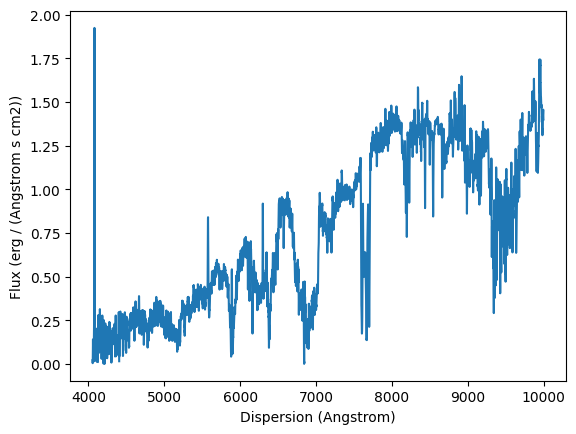

Now use extract region method


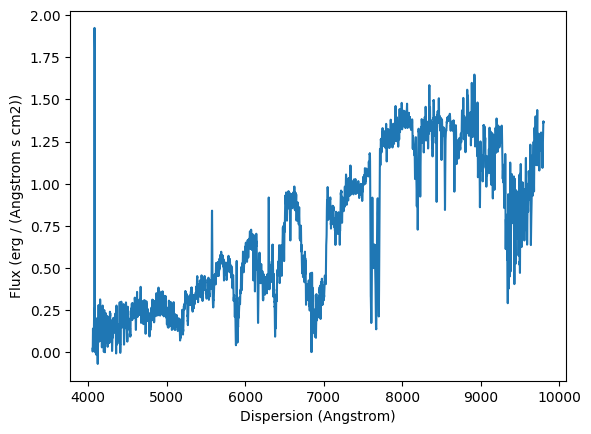

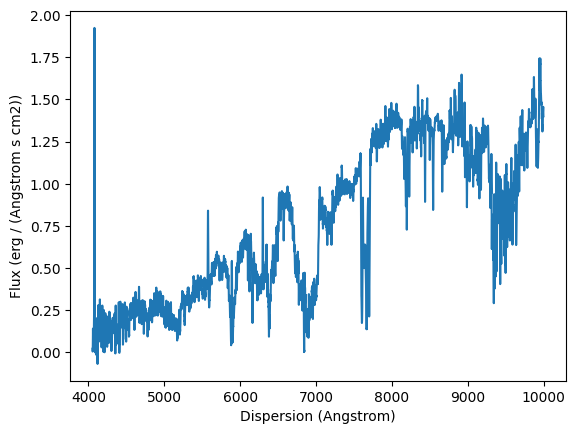

/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1227m0447.txt is plottable



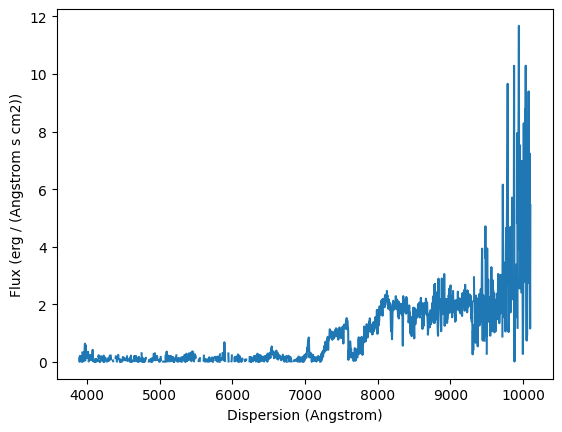

Now use extract region method


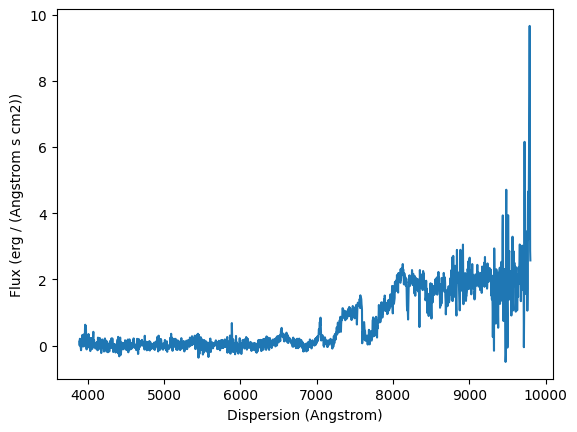

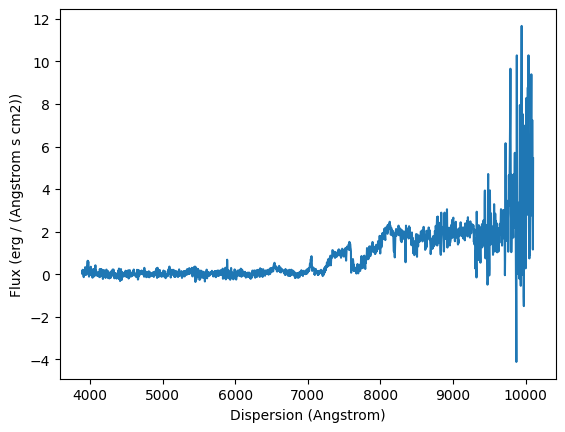

/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1411m4524.txt is plottable



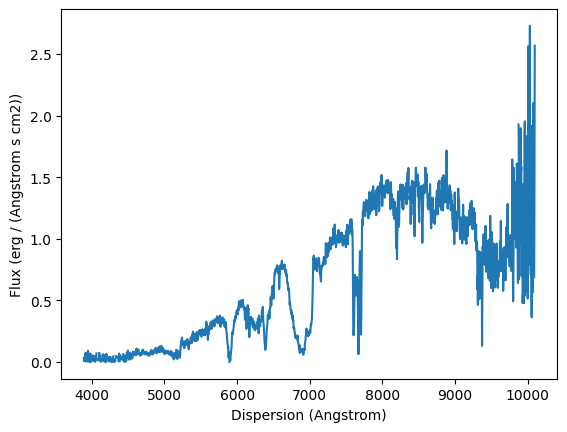

Now use extract region method


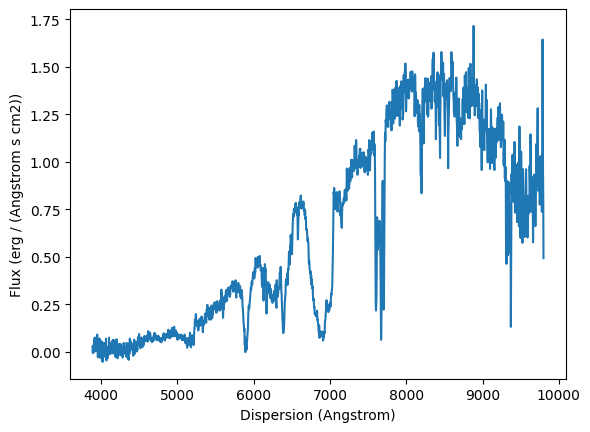

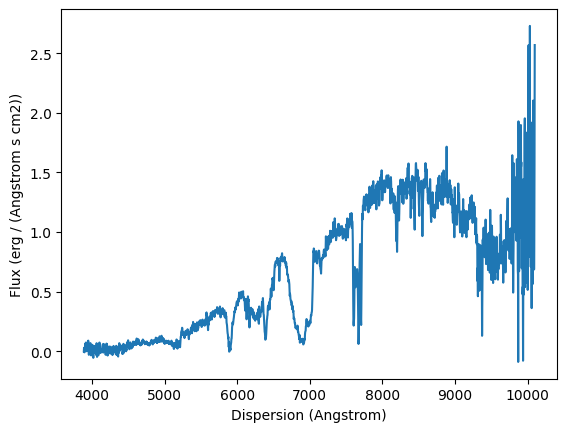

/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1614m8151.txt is plottable



In [20]:
"""  Process source with BCSec spectra: Telescope: LCO-duP
Read the data on two columns:
#1: wavelength      #2: flux
"""
from specutils import Spectrum, SpectralRegion
from specutils.manipulation import extract_region
from astropy.nddata import StdDevUncertainty
from specutils import Spectrum
from specutils.manipulation import snr_threshold


for file in files:

    data = np.loadtxt(file, comments="#")

    wavelength = data[:, 0] * u.AA
    flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.AA)
    uncertainty_array = np.abs(flux) * 0.10
    uncertainty = StdDevUncertainty(uncertainty_array)


    # Create a spectrum object
    spectrum = Spectrum(flux=flux, spectral_axis=wavelength, uncertainty=uncertainty)
    spectrum_extracted = extract_region(spectrum, SpectralRegion(0 * u.AA, 10000 * u.AA))

    snr_limit = 8
    spectrum_masked = snr_threshold(spectrum, snr_limit)

    masked_flux = spectrum_masked.flux.copy()
    masked_flux[spectrum_masked.mask] = np.nan

    spectrum_masked = Spectrum(
        flux=masked_flux,
        spectral_axis=wavelength,
        uncertainty=uncertainty
    )

    # Plot the masked spectrum
    if check_spectrum_plottable(spectrum_masked, show_plot=True):
        print(f"Now use extract region method")
        check_spectrum_plottable(spectrum_extracted, show_plot=True)
        check_spectrum_plottable(spectrum, show_plot=True)
        print(f"{file} is plottable\n")
